# FIFA WORLD CUP 2022 SENTIMENT ANALYSIS

## Introduction
This is a twitter sentiment analysis project of the 2022 FIFA WORLD CUP in Qatar. To find out what football fans think about the FIFA World Cup 2022, I'll conduct a Twitter sentiment analysis using some World Cup hashtags. The tweet is taken from diffreent days of the world cup and combined into one master dataset. 

## Importing Useful libraries

In [77]:
#Import the useful libraries for project environment
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob # to return all the CSV files’ list located within the path
import time
import preprocessor as p # To clean the tweet fro hastags, usernames and emojis
import re # Import regular expression

##  Web Scrapping

### Code

In [2]:
#Scraping relevant tweets using snscrape from twitter

query = '((#fifaworldcup2022 OR #fifaworldcup OR #worldcup2022) lang:en until:2022-12-21 since:2022-11-14)'
tweets = []
limit = 10

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.user.location, 
                tweet.rawContent, tweet.retweetCount, tweet.likeCount])

#Save the data to a dataframe

df = pd.DataFrame(tweets, columns=["Date", "Username", "Locations", "Content", "Retweets", "Favorites"])



### Test

In [3]:
# Check the dataframe
df.head()

,Date,Username,Locations,Content,Retweets,Favorites
0,2022-12-20 23:59:08+00:00,knew_channel,Hong Kong,No one to talk or make hype on this such a sha...,0,0
1,2022-12-20 23:58:15+00:00,christo_comedy,"Abia, Nigeria",Shout out verse fake life 😩\n-\nBirthday Bless...,0,1
2,2022-12-20 23:57:55+00:00,beINSPORTSUSA,United States,This is how Leo Messi arrived at his home in R...,29,172
3,2022-12-20 23:57:51+00:00,StatsDataFacts,"London, England",Countries with the most FIFA World Cup titles ...,0,2
4,2022-12-20 23:57:51+00:00,CharlesTheSwift,New York,Will @KMbappe hairline survive until the next ...,0,0


In [76]:
#Save the data to csv file

df.to_csv("Dec_.csv", index=False)

### Define  
Merge the csv files into one file

### Code

In [4]:
### Check the files in the directory
os.chdir(r"C:\Users\user\Documents\DA Projects\Python\FIFA_CSV")
csv_files = glob.glob( '*.csv' )
csv_files

['FIFA_World_Cup_2022.csv',
 'FIFA_WORLD_CUP_2022_Dec_10.csv',
 'FIFA_WORLD_CUP_2022_Dec_11.csv',
 'FIFA_WORLD_CUP_2022_Dec_13_14.csv',
 'FIFA_WORLD_CUP_2022_Dec_15_17.csv',
 'FIFA_WORLD_CUP_2022_Dec_18.csv',
 'FIFA_WORLD_CUP_2022_Dec_19.csv',
 'FIFA_WORLD_CUP_2022_Dec_20.csv',
 'FIFA_WORLD_CUP_2022_Nov_14-17.csv',
 'FIFA_WORLD_CUP_2022_Nov_18-19.csv',
 'FIFA_WORLD_CUP_2022_Nov_21_20.csv']

In [129]:
path = r"C:\Users\user\Documents\DA Projects\Python\FIFA_CSV"
all_csv_files = glob.glob(path + "/*.csv")

tweets = []

# Convert each csv to a dataframe

for filename in all_csv_files:
    df = pd.read_csv(filename, index_col = None, header = 0) 
    tweets.append(df)
    
# Merge all dataframes

FIFA_df = pd.concat(tweets, axis=0, ignore_index = True) 

FIFA_df.head()

,Date,Username,Locations,Content,Retweets,Favorites
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5
2,2022-12-10 23:59:52+00:00,MpatrioticM,ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ 🇲🇦,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,10,70
3,2022-12-10 23:59:52+00:00,masuma114,"London, England",Why do black England players always get so muc...,0,4
4,2022-12-10 23:59:46+00:00,Mexitly81,"California, USA","No surprise, classless organization. I guess i...",0,0


In [49]:
# Save df to one csv file

FIFA_df.to_csv("FIFA_World_Cup_2022.csv", index = False)

In [5]:
# Read the csv file into dataframe
df = pd.read_csv("FIFA_World_Cup_2022.csv")

In [7]:
df.tail()

,Date,Username,Locations,Content,Retweets,Favorites
617018,2022-11-20 15:07:31+00:00,sataekooklang,NaN,Jungkookie! 😭 \n💜\n#DreamersJungkook \n#Dreame...,10,41
617019,2022-11-20 15:07:31+00:00,Sir_Stevensarp,AngelTown,The tune dey go on though. #FIFAWorldCup,0,1
617020,2022-11-20 15:07:31+00:00,kassimisola,"London, England",I knew the opening ceremony in Qatar will be a...,0,0
617021,2022-11-20 15:07:31+00:00,btslostacc,♡,Jungkook slayed #WorldCup2022,0,0
617022,2022-11-20 15:07:30+00:00,natasyaeffriani,Jakarta,not me crying every time i watch a sports fest...,0,0


## Data Cleaning

### Define 
Check null values

### Code

In [7]:
#Check null values
df.isnull().sum()

Date              0
Username          2
Locations    176454
Content           0
Retweets          0
Favorites         0
dtype: int64

###### The null location is understandable given that not every Twitter user tweets from their location, but I will look into the null value in the username further.

In [8]:
df[df['Username'].isnull()]

,Date,Username,Locations,Content,Retweets,Favorites
452511,2022-11-15 00:22:14+00:00,NaN,"San Antonio, TX",Shirts ordered for #WorldCup2022 https://t.co/...,0,3
528135,2022-11-20 19:06:54+00:00,NaN,"San Antonio, TX",On the road to Doha starting at @SATairport #F...,0,11


### Test

In [8]:
# Drop the null values in the USername column

df.dropna(subset=['Username'], inplace=True)

#Check again
df.isnull().sum()

Date              0
Username          0
Locations    176454
Content           0
Retweets          0
Favorites         0
dtype: int64

In [9]:
# Replace "NaN" values in the location with "Unknown"
df["Locations"].fillna("Unknown", inplace = True)

In [60]:
#Check again
df.isnull().sum()

Date         0
Username     0
Locations    0
Content      0
Retweets     0
Favorites    0
dtype: int64

### Define 
Check for duplicates

### Code

In [11]:
# Check for duolicates
df.duplicated().sum()

15

In [10]:
# Drop the duplicate rows
df.drop_duplicates(subset=None, keep="first", inplace=True)

### Test

In [13]:
#Check again for duplicates
df.duplicated().sum()

0

In [11]:
#Check the description of the dataset
df.describe()

,Retweets,Favorites
count,617006.000000,617006.000000
mean,5.651269,33.051810
std,457.320311,1481.945343
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,296698.000000,793393.000000


In [18]:
# Check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1 non-null      datetime64[ns, UTC]
 1   Username   1 non-null      object             
 2   Locations  1 non-null      object             
 3   Content    1 non-null      object             
 4   Retweets   1 non-null      int64              
 5   Favorites  1 non-null      int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 176.0+ bytes


### Define 
Convert date column to the correct data type

### Code

In [13]:
# Convert the date column to datetime type

df['Date'] = df['Date'].apply(pd.to_datetime)

### Test

In [14]:
# Check the dataset
df['Date'].dtypes

datetime64[ns, UTC]

### Define
I will use Preprocessor library to clean the tweet column and remove - URLs, Hashtags, Mentions, Reserved words (RT, FAV),Emojis and Smileys

In [15]:
# Calling a function to clean the tweet
def preprocess_tweet(df):
    text = df['Content']
    text = p.clean(text)
    return text
df['clean_tweet'] = df.apply(preprocess_tweet, axis=1)

### Test

In [16]:
df.head()

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,I just earned the 'World Pint (2022)' badge on !
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,France Morocco Date Kick-off time How to watch...
2,2022-12-10 23:59:52+00:00,MpatrioticM,ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ 🇲🇦,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,10,70,Glory to Africa
3,2022-12-10 23:59:52+00:00,masuma114,"London, England",Why do black England players always get so muc...,0,4,Why do black England players always get so muc...
4,2022-12-10 23:59:46+00:00,Mexitly81,"California, USA","No surprise, classless organization. I guess i...",0,0,"No surprise, classless organization. I guess i..."


In [17]:
df['hashtag'] = df['Content'].apply(lambda x: re.findall(r'#(\w+)', x))

In [18]:
df.head(2)

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet,hashtag
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,I just earned the 'World Pint (2022)' badge on !,"[football, fifaworldcup, worldcup]"
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,France Morocco Date Kick-off time How to watch...,"[FIFAWorldCup, FRA, MAR]"


### Define
Convert tweets to lowercase

### Code

In [19]:
df['clean_tweet'] = df['clean_tweet'].astype(str).str.lower()

### Test

In [20]:
df.head()

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet,hashtag
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,i just earned the 'world pint (2022)' badge on !,"[football, fifaworldcup, worldcup]"
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,france morocco date kick-off time how to watch...,"[FIFAWorldCup, FRA, MAR]"
2,2022-12-10 23:59:52+00:00,MpatrioticM,ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ 🇲🇦,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,10,70,glory to africa,[FIFAWorldCup2022]
3,2022-12-10 23:59:52+00:00,masuma114,"London, England",Why do black England players always get so muc...,0,4,why do black england players always get so muc...,"[WorldCup2022, England]"
4,2022-12-10 23:59:46+00:00,Mexitly81,"California, USA","No surprise, classless organization. I guess i...",0,0,"no surprise, classless organization. i guess i...",[WorldCup2022]


### Define
Break up the tweets into units by performing tokenization

### Code

In [21]:
### Import RegexTokenizer

from nltk.tokenize import RegexpTokenizer

In [22]:
regex = RegexpTokenizer('\w+')

df['tweet_token']=df['clean_tweet'].apply(regex.tokenize)

### Test

In [23]:
df.head()

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet,hashtag,tweet_token
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,i just earned the 'world pint (2022)' badge on !,"[football, fifaworldcup, worldcup]","[i, just, earned, the, world, pint, 2022, badg..."
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,france morocco date kick-off time how to watch...,"[FIFAWorldCup, FRA, MAR]","[france, morocco, date, kick, off, time, how, ..."
2,2022-12-10 23:59:52+00:00,MpatrioticM,ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ 🇲🇦,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,10,70,glory to africa,[FIFAWorldCup2022],"[glory, to, africa]"
3,2022-12-10 23:59:52+00:00,masuma114,"London, England",Why do black England players always get so muc...,0,4,why do black england players always get so muc...,"[WorldCup2022, England]","[why, do, black, england, players, always, get..."
4,2022-12-10 23:59:46+00:00,Mexitly81,"California, USA","No surprise, classless organization. I guess i...",0,0,"no surprise, classless organization. i guess i...",[WorldCup2022],"[no, surprise, classless, organization, i, gue..."


### Define
Drop stop words from tweet token since they dont contain valuavle information and they take valuable processing time

### Code

In [24]:
# Import NLTK then download stopwords package

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

# list of english stopwords

stopwords = nltk.corpus.stopwords.words("english")

In [26]:
# Exclude stopwords with Python's list comprehensionn apply method

df['tweet_token'] = df['tweet_token'].apply(lambda x: [item for item in x if item not in stopwords])

### Test

In [27]:
df.head(2)

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet,hashtag,tweet_token
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,i just earned the 'world pint (2022)' badge on !,"[football, fifaworldcup, worldcup]","[earned, world, pint, 2022, badge]"
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,france morocco date kick-off time how to watch...,"[FIFAWorldCup, FRA, MAR]","[france, morocco, date, kick, time, watch, tea..."


### Define
Take a list of words in the "tweet_token" column, filtering out words with fewer than 3 characters, and creating a new string column "tweet_string" that contains the remaining words separated by spaces.

### Code

In [28]:
df['tweet_string'] = df['tweet_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

### Test

In [33]:
df.head(3)

,Date,Username,Locations,Content,Retweets,Favorites,clean_tweet,hashtag,tweet_token,tweet_string
0,2022-12-10 23:59:57+00:00,OSUBlockie,"Columbus, OH",I just earned the 'World Pint (2022)' badge on...,0,0,i just earned the 'world pint (2022)' badge on !,"[football, fifaworldcup, worldcup]","[earned, world, pint, 2022, badge]",earned world pint 2022 badge
1,2022-12-10 23:59:54+00:00,standardsport,"London, England",France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,0,5,france morocco date kick-off time how to watch...,"[FIFAWorldCup, FRA, MAR]","[france, morocco, date, kick, time, watch, tea...",france morocco date kick time watch team newsp...
2,2022-12-10 23:59:52+00:00,MpatrioticM,ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ 🇲🇦,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,10,70,glory to africa,[FIFAWorldCup2022],"[glory, africa]",glory africa


# Define
Save the cleaned data

In [35]:
# Save cleaned dataframe
df.to_pickle("cleaned_data.csv")

### Define 
Create a single string that contains all the words in the "tweet_string" column, separated by spaces.This will be used for counting the frequency of individual words and to finally create a word cloud.

In [37]:
# Initialize an empty list to store words
word_list = []

# Loop over each row in the 'text_string' column of the DataFrame
for text in df['tweet_string']:
    # Split the text into individual words
    words = text.split()
    # Add the words to the list
    word_list.extend(words)

# Combine the words into a single string separated by spaces
all_words = ' '.join(word_list)

### Define
Tokenize the string of words in "all_words" using the word_tokenize method from the NLTK library, and stores the resulting list of tokens in a new variable called "tokenized_words"

In [43]:
# Import the word_tokenize and download punkt
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Code

In [44]:
tokenized_tweets = nltk.tokenize.word_tokenize(all_words)

#### Define
To analyze and visualize the distribution ofthe tokenized words, we create a frequency distribution of the tokens in a list using the FreqDist class from the NLTK library

In [48]:
#Import FreqDist and apply it to tokenized tweets
from nltk.probability import FreqDist

word_distr = FreqDist(tokenized_tweets)
word_distr

FreqDist({'world': 120892, 'cup': 101353, 'messi': 60747, 'argentina': 58289, 'final': 47641, 'france': 43933, 'qatar': 43542, 'morocco': 41043, 'team': 34398, 'game': 33528, ...})

### Define
To take the tweets back to their base forms and improve the accuracy of text analysis, we will perform lemmatization.

### Code

In [49]:
### Download the lexical database of English words that provides information on word meanings
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [50]:
# Import the WordNetLemmatizer class from the nltk.stem module
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

df['tweet_string_lemmatized'] = df['tweet_string'].apply(wordnet_lemmatizer.lemmatize)

In [52]:
df[['Content', 'tweet_token', 'tweet_string', 'tweet_string_lemmatized']].head()

,Content,tweet_token,tweet_string,tweet_string_lemmatized
0,I just earned the 'World Pint (2022)' badge on...,"[earned, world, pint, 2022, badge]",earned world pint 2022 badge,earned world pint 2022 badge
1,France 🆚 Morocco\n\n📆 Date\n⏰ Kick-off time\n📺...,"[france, morocco, date, kick, time, watch, tea...",france morocco date kick time watch team newsp...,france morocco date kick time watch team newsp...
2,Glory to Africa ❤️\n#FIFAWorldCup2022 https://...,"[glory, africa]",glory africa,glory africa
3,Why do black England players always get so muc...,"[black, england, players, always, get, much, h...",black england players always get much hate mat...,black england players always get much hate mat...
4,"No surprise, classless organization. I guess i...","[surprise, classless, organization, guess, won...",surprise classless organization guess wont mat...,surprise classless organization guess wont mat...


### Define
Use wordcloud to quickly visualize the most important words in the lemmatized column

In [57]:
from wordcloud import WordCloud

### Code

In [56]:
# Create a single string that represents all the words in the colum 'text_string_lemmatized'
all_words_lemmatized = ' '.join([word for word in df['tweet_string_lemmatized']])

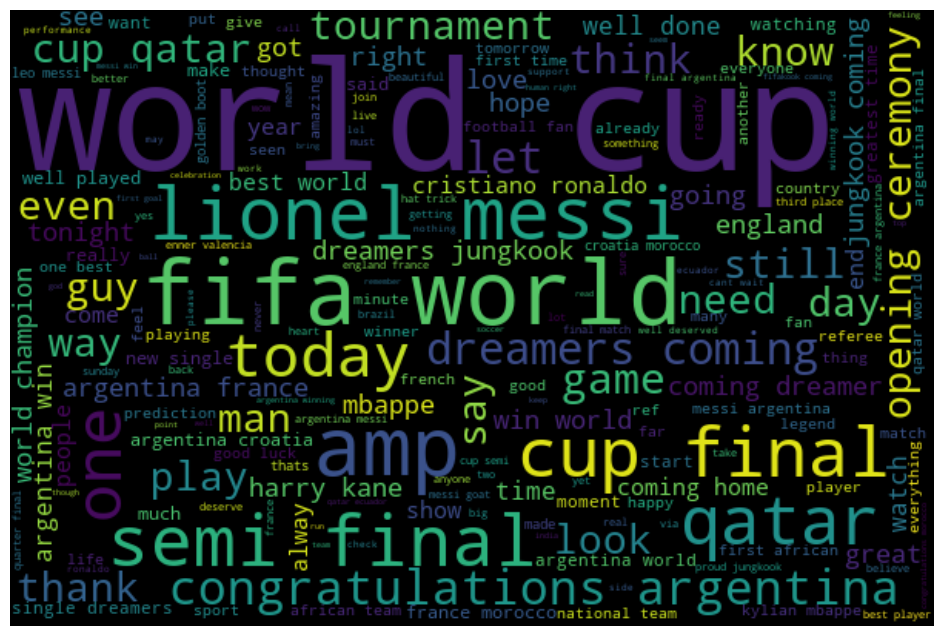

In [75]:
# Create a WordCloud object with specified parameters
wordcloud = WordCloud(width=600, height=400, random_state=2, max_font_size=100)

# Generate the word cloud image based on the lemmatized words
wordcloud_image = wordcloud.generate(all_words_lemmatized)

# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Display the word cloud image with bilinear interpolation and remove axis
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off');